In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('income.csv')

In [68]:
df 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [69]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [70]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [71]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [72]:
df = pd.concat([df.drop('occupation', axis=1),pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1),pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1),pd.get_dummies(df['marital-status'], dtype=int).add_prefix('martial-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1),pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1),pd.get_dummies(df.race, dtype=int).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1),pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country_')], axis=1)

In [73]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [74]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [75]:
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'martial-status_Divorced', 'martial-status_Married-AF-spouse',
       'martial-status_Married-civ-spouse',
       'martial-status_Married-spouse-absent',
       'mart

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

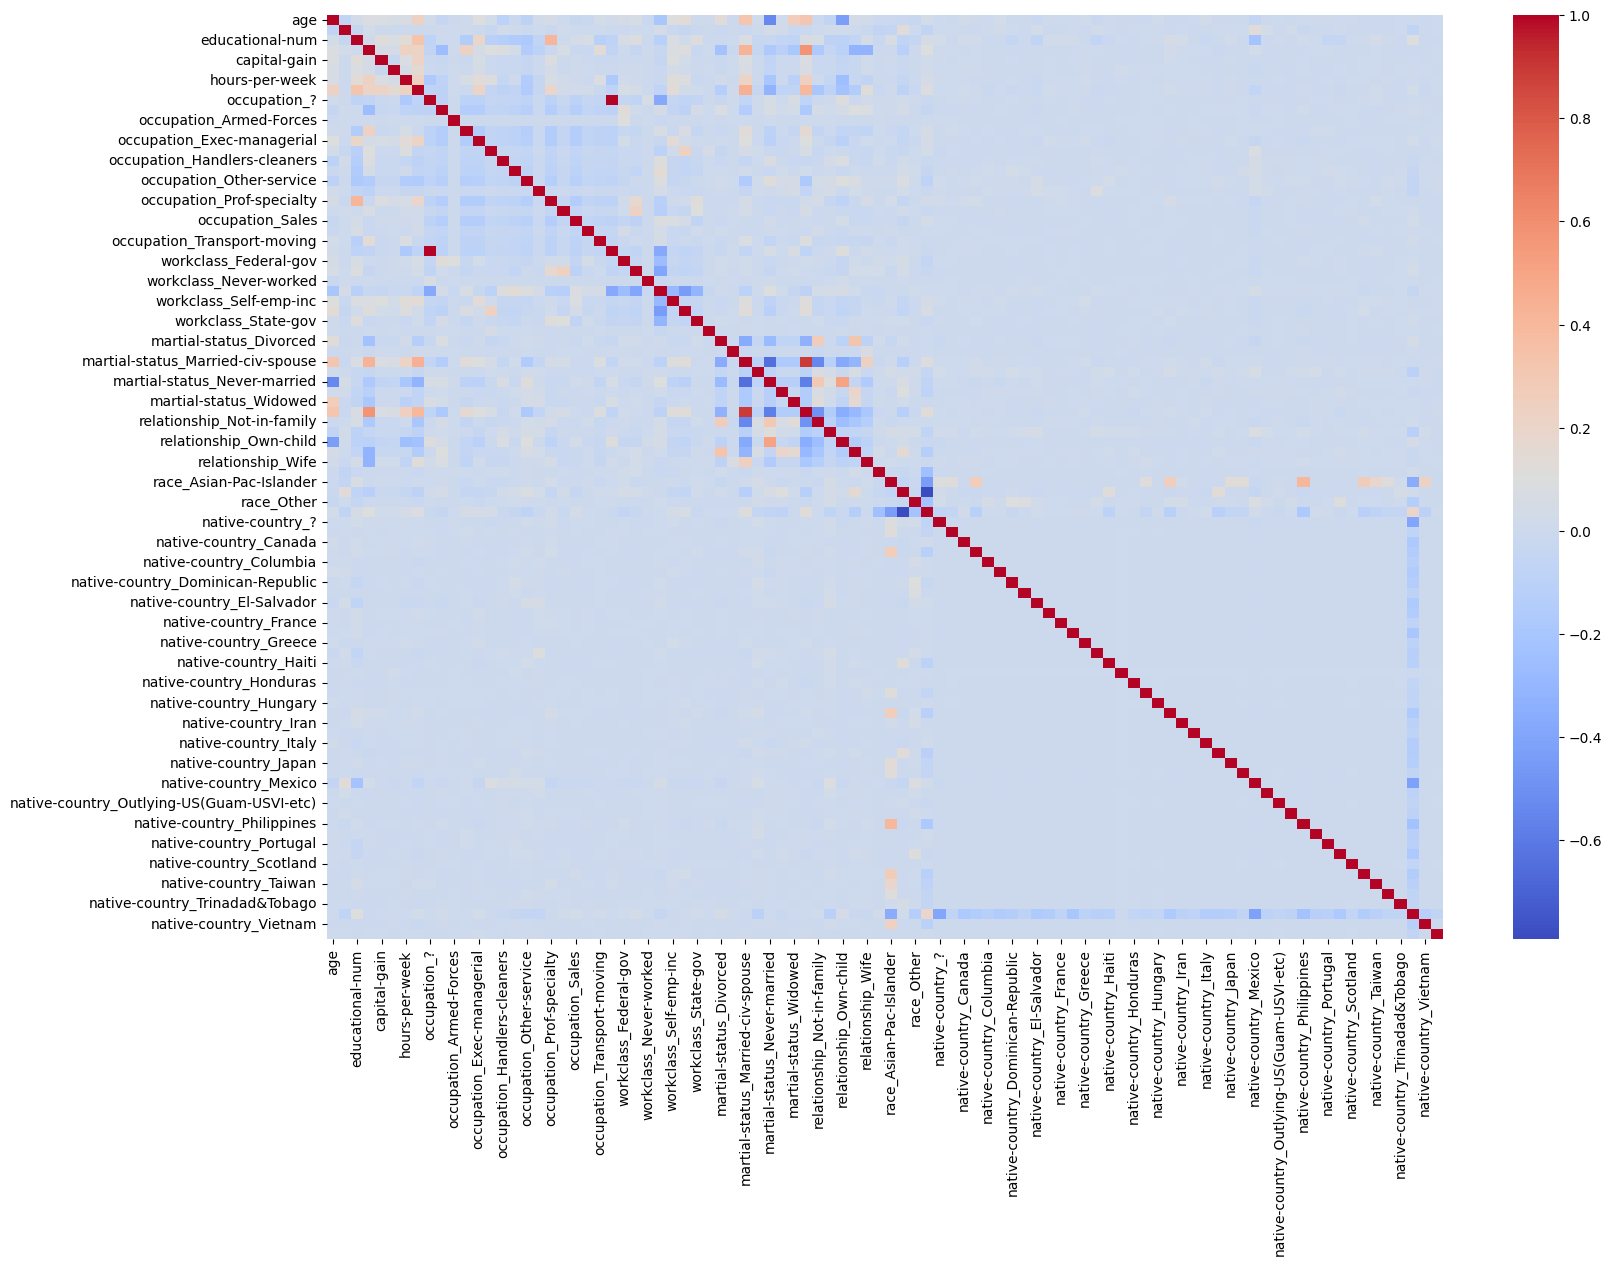

In [77]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [78]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [80]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
columns_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(columns_to_drop, axis=1)


In [82]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,martial-status_Divorced,martial-status_Married-civ-spouse,martial-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

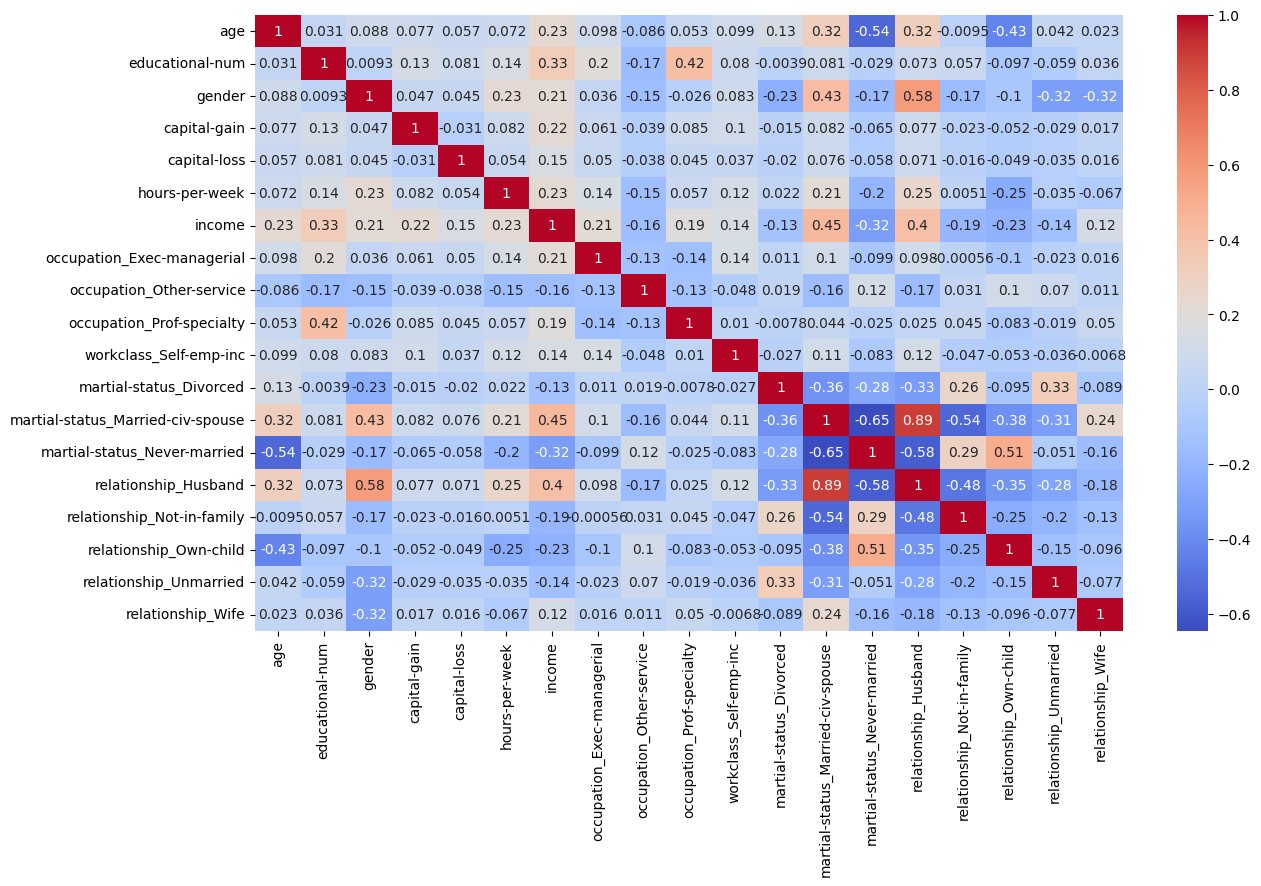

In [85]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [98]:
df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [99]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
19447,53,10,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34511,60,9,1,0,0,70,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24921,19,10,1,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14428,46,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25477,46,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41699,39,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16438,71,10,1,0,1816,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
46579,20,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17757,38,9,0,0,0,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38125,20,10,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38109,57,9,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10134,18,7,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6590,25,4,1,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15110,18,10,1,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35976,41,11,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40763,51,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
45684,31,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30454,40,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [101]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [102]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [103]:
forest.score(test_X, test_y)

0.8431773978912888

In [104]:
forest.feature_importances_

array([2.28084877e-01, 1.31718417e-01, 1.39989024e-02, 1.10677170e-01,
       3.82964306e-02, 1.13127255e-01, 1.80914934e-03, 5.32621558e-03,
       6.66160880e-05, 5.77165002e-03, 2.05537001e-02, 4.30314654e-03,
       3.80320199e-03, 3.84541269e-03, 8.04373480e-03, 1.52785172e-04,
       1.80898384e-02, 2.82039732e-03, 6.24783069e-03, 4.68105113e-03,
       4.00425659e-03, 1.60121876e-03, 5.33764741e-03, 5.47332211e-03,
       1.30421505e-06, 9.22090784e-03, 6.68989564e-03, 7.74725005e-03,
       4.32179290e-03, 1.47133474e-04, 7.55821454e-03, 3.60562899e-04,
       6.38727696e-02, 1.04814093e-03, 2.31695931e-02, 2.08002555e-03,
       1.84703069e-03, 5.16536871e-02, 1.17575378e-02, 1.60529462e-03,
       1.02133603e-02, 5.08003086e-03, 9.74225454e-03, 1.39457878e-03,
       3.08836363e-03, 4.93727237e-03, 9.35952866e-04, 6.11201745e-03,
       2.86574011e-03, 3.46536191e-04, 1.48282389e-03, 6.08920818e-04,
       2.86516149e-04, 7.69884918e-04, 2.40937150e-04, 1.67445328e-04,
      

In [105]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'martial-status_Divorced', 'martial-status_Married-AF-spouse',
       'martial-status_Married-civ-spouse',
       'martial-status_Married-spouse-absent',
       'martial-status_Never-mar

In [106]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [107]:
importances

{'age': 0.2280848771601585,
 'educational-num': 0.13171841675414925,
 'hours-per-week': 0.11312725462002687,
 'capital-gain': 0.11067716988207799,
 'martial-status_Married-civ-spouse': 0.06387276963307391,
 'relationship_Husband': 0.05165368713055067,
 'capital-loss': 0.0382964306497671,
 'martial-status_Never-married': 0.023169593140313655,
 'occupation_Exec-managerial': 0.020553700100633295,
 'occupation_Prof-specialty': 0.018089838366969153,
 'gender': 0.013998902437493724,
 'relationship_Not-in-family': 0.011757537810198521,
 'relationship_Own-child': 0.010213360290279036,
 'relationship_Wife': 0.009742254543903853,
 'workclass_Private': 0.00922090783970996,
 'occupation_Other-service': 0.008043734804639074,
 'workclass_Self-emp-not-inc': 0.0077472500495423,
 'martial-status_Divorced': 0.007558214541209019,
 'workclass_Self-emp-inc': 0.006689895639673829,
 'occupation_Sales': 0.006247830693881821,
 'native-country_United-States': 0.006160357549498378,
 'race_White': 0.0061120174462

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {
    'n_estimators' : [50, 100, 250],
    'max_depth' : [5, 10, 30, None],
    'min_samples_split' : [2, 4],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [110]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.5s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.832 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [111]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [112]:
forest = grid_search.best_estimator_

In [113]:
forest.score(test_X, test_y)

0.8550516941345071

In [114]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [115]:
importances

{'age': 0.1547295590437857,
 'educational-num': 0.13855192683691317,
 'capital-gain': 0.13729528070423644,
 'hours-per-week': 0.09020560319708648,
 'martial-status_Married-civ-spouse': 0.08501316730694582,
 'capital-loss': 0.04509952971582386,
 'relationship_Husband': 0.0422095471448312,
 'martial-status_Never-married': 0.0341702814459066,
 'occupation_Exec-managerial': 0.024339686821770252,
 'occupation_Prof-specialty': 0.021251019740732804,
 'relationship_Not-in-family': 0.018376223482245664,
 'gender': 0.017169780666968868,
 'relationship_Own-child': 0.016721167933748116,
 'occupation_Other-service': 0.010695386694375808,
 'relationship_Wife': 0.010185197432927208,
 'martial-status_Divorced': 0.009967697919308289,
 'workclass_Private': 0.00867028672776949,
 'workclass_Self-emp-not-inc': 0.008338996263601422,
 'workclass_Self-emp-inc': 0.007594366198911584,
 'relationship_Unmarried': 0.007519854181146037,
 'race_White': 0.006111351926504999,
 'native-country_United-States': 0.0059682